In [1]:
import psycopg2
import pandas as pd
import sys

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
from scipy.stats import kde

sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
# create connection
def get_db_handle(dbname="testdb", rolename ="spotify"):
    com = None
    constr = "host='localhost' dbname='"+dbname+"'  user='"+rolename+"' password='ics'"
    try:
        con = psycopg2.connect(constr)
    except Exception as e:
        if con: 
            con.rollback()
        print('Error creating or connecting handle', str(e))
        sys.exit(1)
    if con is None:
        print('Error creating handle', str(e))
        sys.exit(1)
    return con

In [3]:
# open a cursor and fetch db to a pandas dataframe
def query_db_translate_to_pandas(con, querystring):
    df = None
    try:
        cur = con.cursor()
        df = pd.read_sql(querystring, con)
    except Exception as e:
        con.rollback() # meaning break the connection safely
        print("Error in printing table", str(e))
    return df

In [4]:
def close_db(handle1):
    if handle1:
        handle1.close()
    return

In [6]:
'''
‘Chanchal’ -- Lively, Upbeat: Vrindawani Sarang, Tilak Kamod, Adana, Bageshree, Gara, Puriya Dhanashree, Madhuvanti
‘Shant’ – Serene, Quiet, Peaceful: Raag Bhupali, Raag Bhim Palasi, Raag Bhairav, Malkauns, Kedar, Bhairav, Bhairavi, Hindol
‘Gambhir’ - Serious: Raag Bageshri, Raag Purvi, Raag Bhairavi, Darbari, Malkauns, Desh, Sorath, Darbari Kanada
‘Karun’ – Sad, Compassionate: Raga bihaag, Raag Desh, Raag Peelu, Shant, Karun, Ahir Bhairav, Hindol
'Vairagi' -- Bhairav,
'Bhakti' -- Bhairav, Bhairavi, Patdeep, Ahir Bhairav, Hindol, Bageshree
'Hasya' --comic:
'Heroic' -- anxious, restless, foreboding, sunset: Marwa
'''

"\n‘Chanchal’ -- Lively, Upbeat: Vrindawani Sarang, Tilak Kamod, Adana, Bageshree, Gara, Puriya Dhanashree, Madhuvanti\n‘Shant’ – Serene, Quiet, Peaceful: Raag Bhupali, Raag Bhim Palasi, Raag Bhairav, Malkauns, Kedar, Bhairav, Bhairavi, Hindol\n‘Gambhir’ - Serious: Raag Bageshri, Raag Purvi, Raag Bhairavi, Darbari, Malkauns, Desh, Sorath, Darbari Kanada\n‘Karun’ – Sad, Compassionate: Raga bihaag, Raag Desh, Raag Peelu, Shant, Karun, Ahir Bhairav, Hindol\n'Vairagi' -- Bhairav,\n'Bhakti' -- Bhairav, Bhairavi, Patdeep, Ahir Bhairav, Hindol, Bageshree\n'Hasya' --comic:\n'Heroic' -- anxious, restless, foreboding, sunset: Marwa\n"

# Raga based study

## (1) Chanchal: Vrindavani Sarang or Tilak Kamod
### Ground Truth: lively, upbeat, easygoing

In [10]:
con = get_db_handle()
querystr = "select * from featuredb where (name like \'%Sarang%\' and (name like \'%Vrindavani%\' or name like \'%Brindabani%\' or name like \'%Gaud%\' or name like \'%Shuddha%\') or name like \'%Kamod%\' or name like \'%Tilak%\' or name like \'Hindol\' or name like \'" + "Mangal Bhairav" + "\' or name like \'Kalawati\' or name like \'Kalavati\' or name like \'Hansdhwani\' or name like \'Hamsdhwani\' or name like \'Puriya\' or name like \'Rageshree\'  or name like \'Rageshree\' or name like \'Pilu\' or name like \'Piloo\')"
#(name like \'%Drut%\') and 
df_chanchal = query_db_translate_to_pandas(con, querystr)
df_chanchal.name

0                                         Shuddha Sarang
1                                            Tilak Shyam
2                                Raga Tilak Kamod - Dhun
3                                 Raga Brindabani Sarang
4      Raag Tilak Kamod: Drut Teental - Neer Bharan K...
5                                      Brindabani Sarang
6      Raga:Tilak Shyam in Yamani Bilawal "Tilak Shya...
7                                                   Pilu
8                                                 Puriya
9                                                  Piloo
10                           Raga Kamod, Gat In Jhaptaal
11                   Raga Shuddha Sarang: Alap In Ektaal
12                                                Hindol
13                                                Puriya
14       Raga Shuddha Sarang (Dhrupad Bandish - Jhaptal)
15                   Raga Kamod - Alap - Vilambit Ektaal
16                    Raga Tilak Kamod - Alap - Jhaptaal
17                             

#### Mood analysis on GN data

[57.241379310344826, 22.068965517241381, 6.2068965517241379, 3.4482758620689653, 2.0689655172413794, 2.0689655172413794, 1.3793103448275863, 1.3793103448275863, 0.68965517241379315, 0.68965517241379315, 0.68965517241379315, 0.68965517241379315, 0.68965517241379315, 0.68965517241379315]


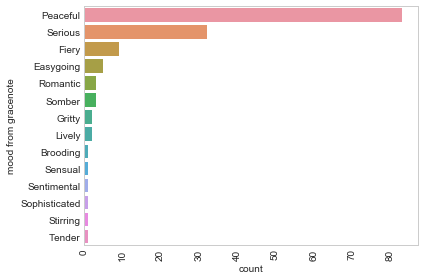

In [13]:
df_chanchal_gn = df_chanchal[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
# print(df_vrindavanisarang_stats.columns)
df_chanchal_gn = df_chanchal_gn.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_chanchal_gn)
plt.xticks(rotation=90);
plt.xlabel('count')
percentage = []
for x in df_chanchal_gn['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_chanchal_gn['id'].as_matrix())))
print(percentage)
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
# plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/chanchal_gat_gn.jpg', dpi = 300)

#### Mood analysis on spotify data

(145, 2)
0.37312689655172426 0.4306655172413796


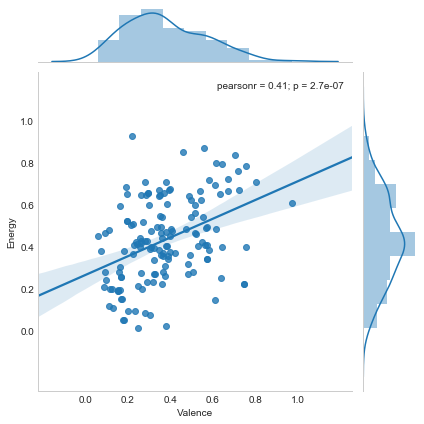

In [24]:
df_chanchal_gat_sp = df_chanchal_gat[['id', 'sp_valence', 'sp_energy']]
df_chanchal_gat_sp = df_chanchal_gat_sp[['sp_valence', 'sp_energy']].astype('float64')
print(df_chanchal_gat_sp.shape)
print(df_chanchal_gat_sp['sp_valence'].mean(), df_chanchal_gat_sp['sp_energy'].mean())
sns.jointplot(x ='sp_valence', y ='sp_energy', data = df_chanchal_gat_sp, kind = 'reg')
plt.xlabel('Valence')
plt.ylabel('Energy')
axis_label = ['0.0','0.2','0.4','0.6','0.8','1.0']
plt.xticks( 1/5*np.arange(6), axis_label)
plt.yticks( 1/5*np.arange(6), axis_label)
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/chanchal_gat_sp.jpg', dpi = 300)

### Alaap

In [9]:
con = get_db_handle()
querystr = "select * from featuredb where (name like \'%Alap%\' or name like \'%Alaap%\') and (name like \'%Sarang%\' and (name like \'%Vrindavani%\' or name like \'%Brindabani%\' or name like \'%Gaud%\' or name like \'%Shuddha%\') or name like \'%Kamod%\' or name like \'%Tilak%\')"
df_chanchal_alap = query_db_translate_to_pandas(con, querystr)
df_chanchal_alap.name

0                   Raga Shuddha Sarang: Alap In Ektaal
1                   Raga Kamod - Alap - Vilambit Ektaal
2                    Raga Tilak Kamod - Alap - Jhaptaal
3     Raga Tilak Kamod - Alap, Gat In Vilambit Teent...
4     Raga Tilak Kamod - Alap, Gat In Vilambit Teent...
5     Raga Tilak Kamod: Alap in Gat Vilambit and Dru...
6     Raga Kamod: Alap ,Jod, Gat In Vilambit / Drut ...
7       Raga Tilak Kamod - Alap - Jod - Gat - Bhairavee
8                    Raga Tilak Shyam: Alap In Teentaal
9                         Raga Tilak Kamod-Alap (Sitar)
10                              Tilak Kamod: Short Alap
11                   Raga Gaud Sarang - Alap - Teentaal
12                                Raga Gaud Sarang Alap
13    Raga Brindabani Sarang Alap - Raga Brindabani ...
14                                     Raga Kamod: Alap
15                   Raga Tilak Shyam: Alap in Teentaal
Name: name, dtype: object

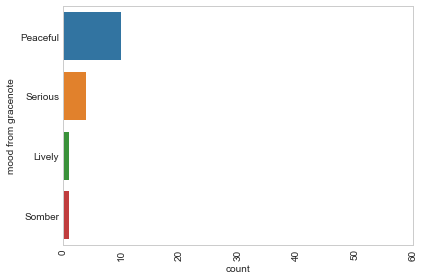

In [10]:
df_chanchal_alap_gn = df_chanchal_alap[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
# print(df_vrindavanisarang_stats.columns)
df_chanchal_alap_gn = df_chanchal_alap_gn.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_chanchal_alap_gn)
plt.xticks(rotation=90);
plt.xlabel('count')
axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/chanchal_alap_gn.jpg', dpi = 300)

(16, 2)


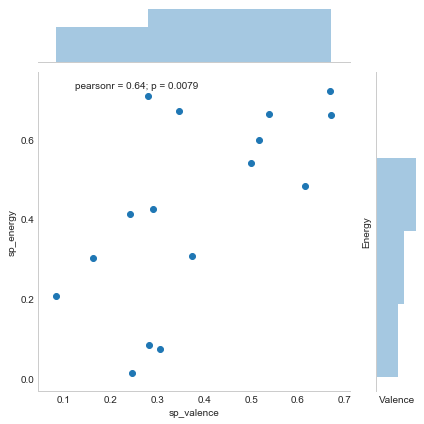

In [11]:
df_chanchal_alap_sp = df_chanchal_alap[['id', 'sp_valence', 'sp_energy']]
df_chanchal_alap_sp = df_chanchal_alap_sp[['sp_valence', 'sp_energy']].astype('float64')
print(df_chanchal_alap_sp.shape)
sns.jointplot(x ='sp_valence', y ='sp_energy', data = df_chanchal_alap_sp)
plt.xlabel('Valence')
plt.ylabel('Energy')
axis_label = ['0.0','0.2','0.4','0.6','0.8','1.0']
plt.xticks( 1/5*np.arange(6), axis_label)
plt.yticks( 1/5*np.arange(6), axis_label)
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/chanchal_alap_sp.jpg', dpi = 300)

In [12]:
#Bageshree, Gara, Puriya Dhanashree, Madhuvanti
con = get_db_handle()
querystr = "select * from featuredb where (name like \'%Gat%\' or name like \'%Tillana%\') and ((name like \'%Puriya%\' and (name like \'%Dhanashri%\' or name like \'%Dhanashree%\')) or name like \'%Bageshri%\' or name like \'%Gara%\' or name like \'%Madhuvanti%\')"
df_romantic_gat = query_db_translate_to_pandas(con, querystr)
df_romantic_gat

,id,name,url,sp_danceability,sp_energy,sp_key,sp_loudness,sp_mode,sp_speechiness,sp_acousticness,...,sp_tempo,gn_gnid,gn_genre_1,gn_genre_2,gn_genre_3,gn_mood_1,gn_mood_2,gn_tempo_1,gn_tempo_2,gn_tempo_3
0,2RBbLhKeaOY7EQULjshHtv,Raga Bageshri: Gat In Ektaal,https://open.spotify.com/track/2RBbLhKeaOY7EQU...,0.301,0.405,2,-15.568,1,0.0457,0.986,...,83.7,3215200-9F7EF09013E5D657723AAFB9D304DAA7,Traditional,Indian Traditional,Hindustani,Peaceful,Quiet / Introspective,Slow Tempo,Slow,40s
1,5KPoVofDt498tHNjLmIwud,Raga Madhuvanti - Gat In Dhrut Teental,https://open.spotify.com/track/5KPoVofDt498tHN...,0.374,0.655,0,-15.972,1,0.118,0.734,...,82.744,34301522-4113AD80A318D5CF80EA76E2A712562E,Traditional,Indian Traditional,Hindustani,Serious,Hypnotic Rhythm,Medium Tempo,Medium,60s
2,1w0aA57wJnlva6HQiHvST7,"Raga:Madhuvanti in Aalap,Gat In Vilambit ,Madh...",https://open.spotify.com/track/1w0aA57wJnlva6H...,0.452,0.36,8,-18.401,1,0.0414,0.853,...,127.833,40423489-897664A105ABC05D9B28D61479F61C24,Traditional,Indian Traditional,Hindustani,Peaceful,Quiet / Introspective,Medium Tempo,Medium Slow,50s
3,1QA1FgMPJfnAFMHQ5A0NjV,Raga Madhuvanti - Gat in vilambit teentaal,https://open.spotify.com/track/1QA1FgMPJfnAFMH...,0.475,0.402,0,-17.386,1,0.0529,0.803,...,99.489,34301522-4113AD80A318D5CF80EA76E2A712562E,Traditional,Indian Traditional,Hindustani,Serious,Hypnotic Rhythm,Medium Tempo,Medium,60s
4,26FVPbKLrlQzpOBSB6pIQG,Raga Bageshri - Gat - Teentaal,https://open.spotify.com/track/26FVPbKLrlQzpOB...,0.273,0.403,3,-13.901,1,0.0466,0.966,...,141.833,16533893-5BBD045A92A52E158FBE450F390ADE00,Traditional,Indian Traditional,Hindustani,Serious,Hypnotic Rhythm,Medium Tempo,Medium,70s
5,4PikHjdbSU1gS7Vpd1B6I1,Raga Bageshri: Gat In Drut Taal,https://open.spotify.com/track/4PikHjdbSU1gS7V...,0.482,0.441,11,-12.863,0,0.0464,0.988,...,96.876,61779056-1B8BF2959FEE38B71DDDF27547C8B684,Traditional,Other Traditions,General World,Serious,Hypnotic Rhythm,Medium Tempo,Medium Fast,100s
6,5gBDMDF1DSadqYdSER61Wi,"Raga Bageshri Alaap,gat: Madhyalaya Ek Taal, D...",https://open.spotify.com/track/5gBDMDF1DSadqYd...,0.401,0.604,0,-12.25,1,0.0453,0.939,...,103.891,61779056-1B8BF2959FEE38B71DDDF27547C8B684,Traditional,Other Traditions,General World,Serious,Hypnotic Rhythm,Medium Tempo,Medium Fast,100s
7,0IwglDRz14eGrMDfEHvY32,Raag Bageshri-Drut Gat,https://open.spotify.com/track/0IwglDRz14eGrMD...,0.239,0.928,6,-6.338,1,0.0681,0.531,...,131.255,347745782-9D36199360388EA993BA05AB68BDAD47,Traditional,Indian Traditional,Hindustani,Peaceful,Delicate / Tranquil,Medium Tempo,Medium Fast,90s
8,3cAnhiChZtw3HuDfX3C4WN,"Raga Madhuvanti: Aalap, Gat, Madhyalaya In Vil...",https://open.spotify.com/track/3cAnhiChZtw3HuD...,0.452,0.36,8,-18.401,1,0.0414,0.853,...,127.833,434630288-F5A222CDFDAE1835B333679F9DB3E0ED,Traditional,Indian Traditional,Hindustani,Serious,Hypnotic Rhythm,Medium Tempo,Medium,60s
9,2juC8qmXAl7dPpDXVITX1b,Gara Gat,https://open.spotify.com/track/2juC8qmXAl7dPpD...,0.469,0.591,10,-12.428,0,0.0397,0.941,...,80.542,348486225-D763A7BAE6CEFDD6D1C70C4FECEB41BE,Traditional,Other Traditions,General World,Lively,Playful / Swingin',Fast Tempo,Very Fast,180s


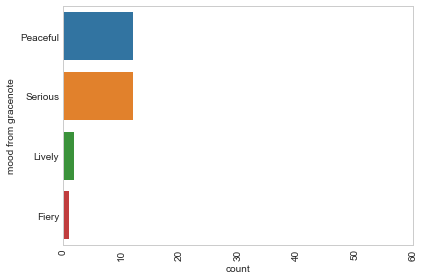

In [13]:
df_romantic_gat_gn = df_romantic_gat[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
# print(df_vrindavanisarang_stats.columns)
df_romantic_gat_gn = df_romantic_gat_gn.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_romantic_gat_gn)
plt.xticks(rotation=90);
plt.xlabel('count')
axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/romantic_gat_gn.jpg', dpi = 300)

(27, 2)


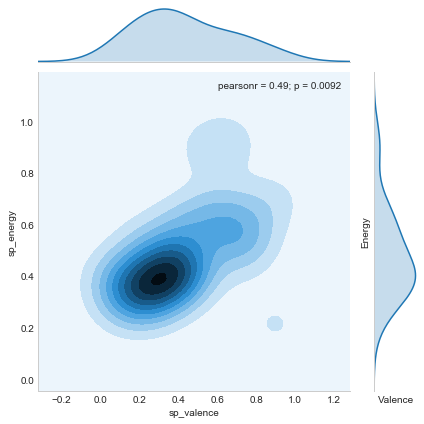

In [14]:
df_romantic_gat_sp = df_romantic_gat[['id', 'sp_valence', 'sp_energy']]
df_romantic_gat_sp = df_romantic_gat_sp[['sp_valence', 'sp_energy']].astype('float64')
print(df_romantic_gat_sp.shape)
sns.jointplot(x ='sp_valence', y ='sp_energy', data = df_romantic_gat_sp, kind='kde')
plt.xlabel('Valence')
plt.ylabel('Energy')
axis_label = ['0.0','0.2','0.4','0.6','0.8','1.0']
plt.xticks( 1/5*np.arange(6), axis_label)
plt.yticks( 1/5*np.arange(6), axis_label)
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/romantic_gat_sp.jpg', dpi = 300)

## Shahnai player bismillah khan

[68.503937007874015, 15.748031496062993, 9.4488188976377945, 3.1496062992125986, 0.78740157480314965, 0.78740157480314965, 0.78740157480314965, 0.78740157480314965]


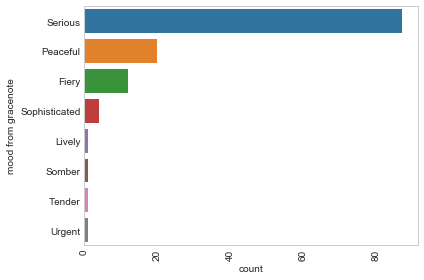

In [15]:
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'%Bismillah%\'"
df_bismillah = query_db_translate_to_pandas(con, querystr)
counter = 0
flist = []
for trackid in df_bismillah['id']:
    querystr = "select * from featuredb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_bk = pd.concat(flist)
# print(df_bk[['name','gn_mood_1']].to_string())

#------------------------------------------------
df_bk = df_bk[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_bk = df_bk.sort_values('id', ascending= False)
percentage = []
for x in df_bk['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_bk['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_bk)
plt.xticks(rotation=90);
plt.xlabel('count')
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
# plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/bismillah.jpg', dpi = 300)

## Santoor player shivkumar sharma

[61.764705882352942, 25.882352941176471, 5.2941176470588234, 3.5294117647058822, 1.1764705882352942, 1.1764705882352942, 1.1764705882352942]


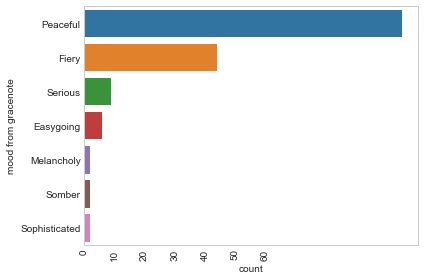

In [16]:
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'" + "Shivkumar Sharma" + "\'"
df_shivks = query_db_translate_to_pandas(con, querystr)
# print(df_shivks)
counter = 0
flist = []
for trackid in df_shivks['id']:
    querystr = "select * from featuredb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_shivks = pd.concat(flist)
# print(df_bk[['name','gn_mood_1']].to_string())

#------------------------------------------------
df_shivks = df_shivks[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_shivks = df_shivks.sort_values('id', ascending= False)
percentage = []
for x in df_shivks['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_shivks['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_shivks)
plt.xticks(rotation=90);
plt.xlabel('count')
axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/shivks.jpg', dpi = 300)

## Flautist Hariprasad Chaurasia

                       id                             name  \
0  6edOwFBabxn2WvPSzrJH1t  African Queen - Raga Hansdhwani   

                                                 url sp_danceability  \
0  https://open.spotify.com/track/6edOwFBabxn2WvP...           0.473   

  sp_energy sp_key sp_loudness sp_mode sp_speechiness sp_acousticness  \
0     0.274     11     -15.547       1         0.0521           0.975   

     ...     sp_tempo                                     gn_gnid  \
0    ...      148.525  452972395-FA1503E052035B321DBE0B3D4B17A095   

    gn_genre_1          gn_genre_2  gn_genre_3  gn_mood_1         gn_mood_2  \
0  Traditional  Indian Traditional  Hindustani  Easygoing  Hopeful / Breezy   

     gn_tempo_1   gn_tempo_2 gn_tempo_3  
0  Medium Tempo  Medium Fast        90s  

[1 rows x 23 columns]
[79.545454545454547, 7.5757575757575761, 4.9242424242424239, 3.0303030303030303, 1.1363636363636365, 1.1363636363636365, 1.1363636363636365, 0.75757575757575757, 0.37878787878787

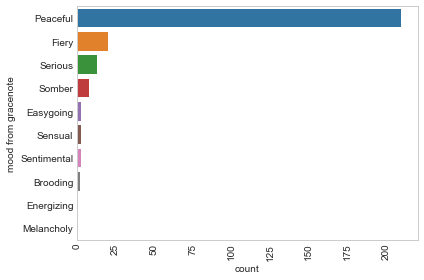

In [40]:
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'" + "Hariprasad Chaurasia" + "\' or artist_name like \'" + "Ronu Majumdar" + "\' or artist_name like \'" + "Rupak Kulkarni" + "\'"
df_flute = query_db_translate_to_pandas(con, querystr)
# result = df_flute['id'] == '6edOwFBabxn2WvPSzrJH1t'
# print(result)
# print(df_flute)
# print(df_shivks)
counter = 0
flist = []
for trackid in df_flute['id']:
    querystr = "select * from featuredb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_flute = pd.concat(flist)
print(df_flute[df_flute['id'] == '6edOwFBabxn2WvPSzrJH1t'])
# print(df_bk[['name','gn_mood_1']].to_string())

#------------------------------------------------
df_flute = df_flute[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_flute = df_flute.sort_values('id', ascending= False)
percentage = []
for x in df_flute['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_flute['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_flute)
plt.xticks(rotation=90);
plt.xlabel('count')
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
# plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/haripc.jpg', dpi = 300)

# Play African Queen by Ronu Majumdar
# 6edOwFBabxn2WvPSzrJH1t


## Tabla by Zakir Hussain

[48.571428571428569, 28.571428571428573, 5.7142857142857144, 5.7142857142857144, 2.8571428571428572, 2.8571428571428572, 2.8571428571428572, 2.8571428571428572]


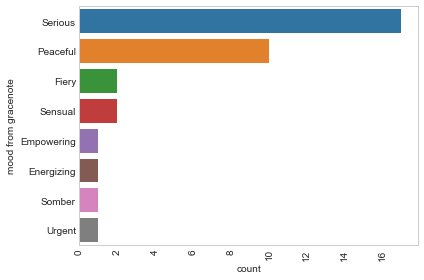

In [25]:
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'" + "Zakir Hussain" + "\' or artist_name like \'" + "Anindo Chatterjee" + "\'"
df_tabla = query_db_translate_to_pandas(con, querystr)
# print(df_shivks)
counter = 0
flist = []
for trackid in df_tabla['id']:
    querystr = "select * from featuredb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_tabla = pd.concat(flist)
# print(df_bk[['name','gn_mood_1']].to_string())

#------------------------------------------------
df_tabla = df_tabla[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_tabla = df_tabla.sort_values('id', ascending= False)
percentage = []
for x in df_tabla['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_tabla['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_tabla)
plt.xticks(rotation=90);
plt.xlabel('count')
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
# plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/tabla.jpg', dpi = 300)

## Sitaar

[56.055363321799305, 22.318339100346019, 5.5363321799307954, 4.6712802768166091, 2.5951557093425603, 2.2491349480968856, 1.2110726643598615, 1.2110726643598615, 1.0380622837370241, 0.86505190311418689, 0.51903114186851207, 0.51903114186851207, 0.34602076124567471, 0.34602076124567471, 0.34602076124567471, 0.17301038062283736]


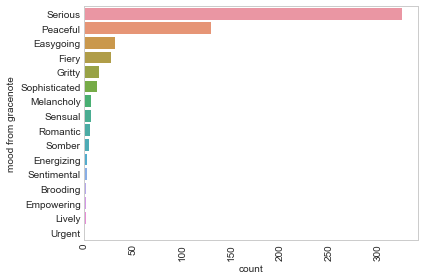

In [31]:
# ali akbar khan, vilayat khan, shahid parvez, ravishankar, budhaditya mukherjee, rash behari datta, shujaat khan
con = get_db_handle()
querystr = "select * from alltracks where artist_name like \'" + "Ali Akbar Khan" + "\' or artist_name like \'" + "Anoushka Shankar" + "\' or artist_name like \'" + "Vilayat Khan" + "\' or artist_name like \'" + "Shahid Parvez" + "\' or artist_name like \'" + "Ravi Shankar" + "\'"
df_sitar = query_db_translate_to_pandas(con, querystr)
counter = 0
flist = []
for trackid in df_sitar['id']:
    querystr = "select * from featuredb where id like \'" + trackid + "\'"
    tempdf = query_db_translate_to_pandas(con, querystr)
    if(tempdf.shape[0] == 0):
        continue
    else:
        flist.append(tempdf)

df_sitar = pd.concat(flist)
# print(df_bk[['name','gn_mood_1']].to_string())

#------------------------------------------------
df_sitar = df_sitar[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_sitar = df_sitar.sort_values('id', ascending= False)
percentage = []
for x in df_sitar['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_sitar['id'].as_matrix())))
print(percentage)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_sitar)
plt.xticks(rotation=90);
plt.xlabel('count')
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
# plt.xticks(np.arange(0,70, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/sitar.jpg', dpi = 300)

## Slow tempo or Vilambit

(423, 23)
[53.664302600472816, 18.203309692671393, 13.475177304964539, 5.2009456264775418, 2.1276595744680851, 1.4184397163120568, 1.4184397163120568, 0.94562647754137119, 0.70921985815602839, 0.70921985815602839, 0.70921985815602839, 0.4728132387706856, 0.2364066193853428, 0.2364066193853428, 0.2364066193853428, 0.2364066193853428]


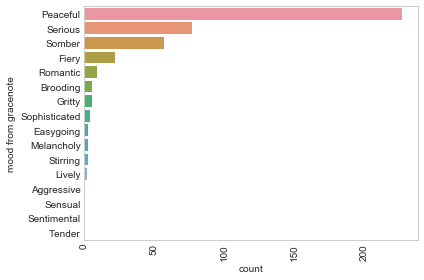

In [42]:
con = get_db_handle()
querystr = "select * from featuredb where name like \'%Vilambit%\' and name not like \'%Drut%\'"
df_vilambit = query_db_translate_to_pandas(con, querystr)
print(df_vilambit.shape)

#-------------------------------------------------------
df_vl = df_vilambit[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_vl = df_vl.sort_values('id', ascending= False)

percentage = []
for x in df_vl['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_vl['id'].as_matrix())))
print(percentage)

ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_vl)
plt.xticks(rotation=90);
plt.xlabel('count')
axis_label = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110']
# plt.xticks(np.arange(0, 110, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/vilambit.jpg', dpi = 300)

## Fast tempo or Drut/Gat

(603, 23)
[  1   2   2   2   3   4   4   5   6   6   7   9  24 115 200 213]
[0.16583747927031509, 0.33167495854063017, 0.33167495854063017, 0.33167495854063017, 0.49751243781094528, 0.66334991708126034, 0.66334991708126034, 0.82918739635157546, 0.99502487562189057, 0.99502487562189057, 1.1608623548922057, 1.4925373134328359, 3.9800995024875623, 19.071310116086234, 33.16749585406302, 35.323383084577117]


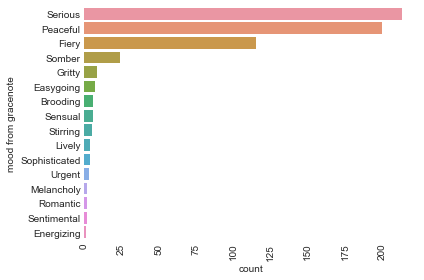

In [48]:
con = get_db_handle()
querystr = "select * from featuredb where name like \'%Drut%\' and name not like \'%Vilambit%\'"
df_fast = query_db_translate_to_pandas(con, querystr)
print(df_fast.shape)

#-------------------------------------------------------
df_fast = df_fast[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
print(df_fast['id'].as_matrix())

percentage = []
for x in df_fast['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_fast['id'].as_matrix())))
print(percentage)

df_fast = df_fast.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_fast)
plt.xticks(rotation=90);
plt.xlabel('count')
# sns.despine(left=True, bottom=True)
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110']
# plt.xticks(np.arange(0, 110, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/drut.jpg', dpi = 300)

## how to add percentage to barplot?

## Singing style

## Alap

(970, 23)
[  1   1   1   2   2   3   3   4   6   8   9  10  10  13  17  26 134 230
 490]
[0.10309278350515463, 0.10309278350515463, 0.10309278350515463, 0.20618556701030927, 0.20618556701030927, 0.30927835051546393, 0.30927835051546393, 0.41237113402061853, 0.61855670103092786, 0.82474226804123707, 0.92783505154639179, 1.0309278350515463, 1.0309278350515463, 1.3402061855670102, 1.7525773195876289, 2.6804123711340204, 13.814432989690722, 23.711340206185568, 50.515463917525771]


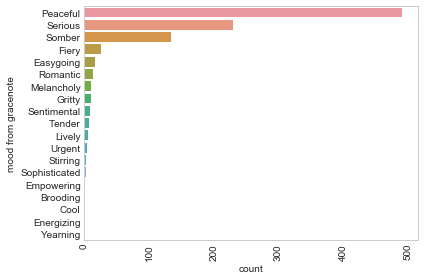

In [45]:
con = get_db_handle()
querystr = "select * from featuredb where name like \'%Alap%\' or name like \'%Alaap%\'"
df_alap = query_db_translate_to_pandas(con, querystr)
print(df_alap.shape)

#-------------------------------------------------------
df_alap = df_alap[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
print(df_alap['id'].as_matrix())

percentage = []
for x in df_alap['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_alap['id'].as_matrix())))
print(percentage)

df_alap = df_alap.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_alap)
plt.xticks(rotation=90);
plt.xlabel('count')
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110']
# plt.xticks(np.arange(0, 110, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/alap.jpg', dpi = 300)

## how to add percentage to barplot?

## Khayal

(420, 23)
[  1   1   2   2   3   4   4   5  12  12  17  20  22  53  59 203]
[0.23809523809523808, 0.23809523809523808, 0.47619047619047616, 0.47619047619047616, 0.7142857142857143, 0.95238095238095233, 0.95238095238095233, 1.1904761904761905, 2.8571428571428572, 2.8571428571428572, 4.0476190476190474, 4.7619047619047619, 5.2380952380952381, 12.619047619047619, 14.047619047619047, 48.333333333333336]


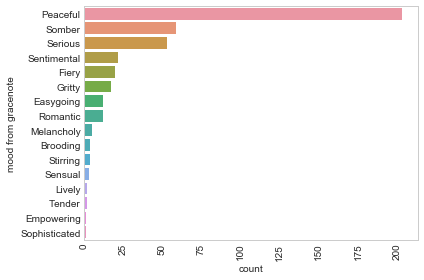

In [46]:
con = get_db_handle()
querystr = "select * from featuredb where name like \'%Khayal%\' or name like \'%Khayaal%\'"
df_khayal = query_db_translate_to_pandas(con, querystr)
print(df_khayal.shape)

#-------------------------------------------------------
df_khayal = df_khayal[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
print(df_khayal['id'].as_matrix())

percentage = []
for x in df_khayal['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_khayal['id'].as_matrix())))
print(percentage)

df_khayal = df_khayal.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_khayal)
plt.xticks(rotation=90);
plt.xlabel('count')
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110']
# plt.xticks(np.arange(0, 110, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/khayal.jpg', dpi = 300)

## how to add percentage to barplot?

## Tarana

(127, 23)
[ 1  1  1  1  2  2  3  3  7  8 10 38 50]
[0.78740157480314965, 0.78740157480314965, 0.78740157480314965, 0.78740157480314965, 1.5748031496062993, 1.5748031496062993, 2.3622047244094486, 2.3622047244094486, 5.5118110236220472, 6.2992125984251972, 7.8740157480314963, 29.921259842519685, 39.370078740157481]


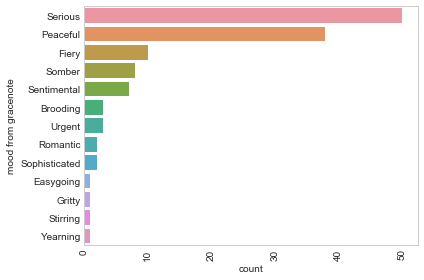

In [47]:
con = get_db_handle()
querystr = "select * from featuredb where name like \'%Tarana%\' or name like \'%taraana%\'"
df_tarana = query_db_translate_to_pandas(con, querystr)
print(df_tarana.shape)

#-------------------------------------------------------
df_tarana = df_tarana[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
print(df_tarana['id'].as_matrix())

percentage = []
for x in df_tarana['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_tarana['id'].as_matrix())))
print(percentage)

df_tarana = df_tarana.sort_values('id', ascending= False)
ax = sns.barplot(x = 'id', y = 'gn_mood_1', data = df_tarana)
plt.xticks(rotation=90);
plt.xlabel('count')
# axis_label = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110']
# plt.xticks(np.arange(0, 110, 10), axis_label )
plt.ylabel('mood from gracenote')
plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/tarana.jpg', dpi = 300)

## how to add percentage to barplot?